In [2]:
!pip install kneed

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


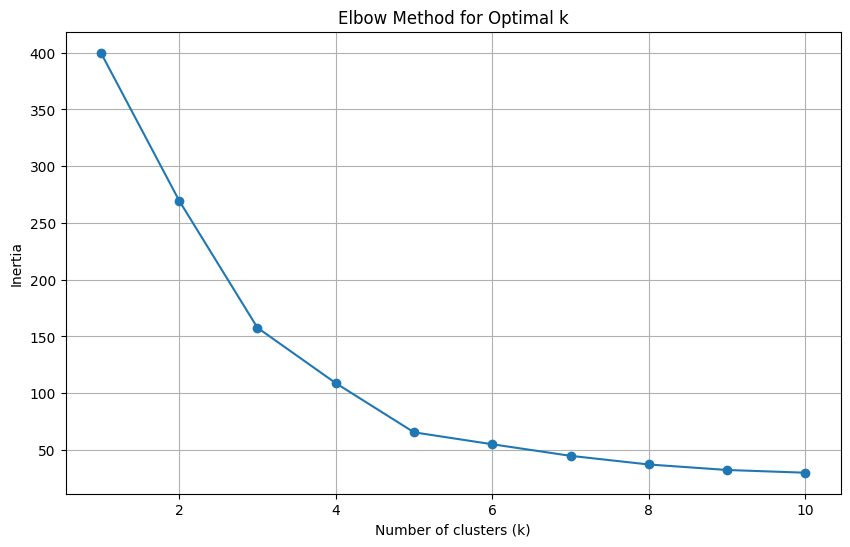

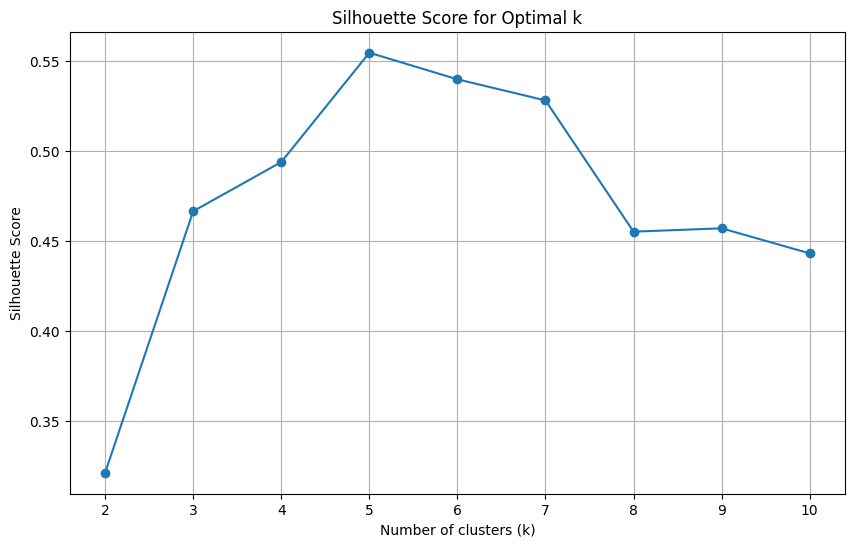

The optimal number of clusters is: 5
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster      Cluster_Name  
0        4  Budget-Conscious  
1        2     Value Seekers  
2        4  Budget-Conscious  
3        2     Value Seekers  
4        4  Budget-Conscious  


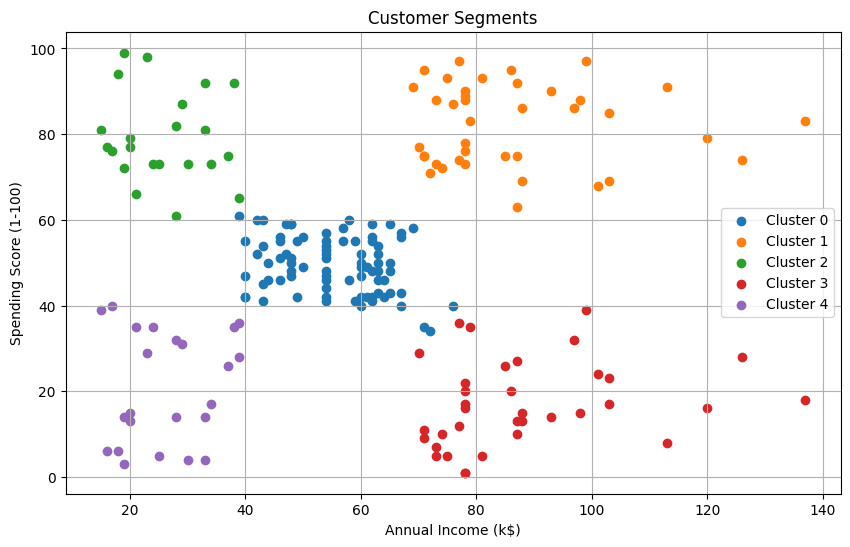

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043

Business Recommendations:
- VIPs → Target with premium offers, loyalty programs.
- Balanced Spenders → Maintain engagement with moderate promotions.
- Value Seekers → Introduce trendy, affordable products.
- Wealthy & Frugal → Encourage upselling with premium value propositions.
- Budget-Conscious → Focus on discounts and low-cost bundles.



In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Load the dataset
dataset = pd.read_csv(r"/Mall_Customers.csv")
print(dataset.head())

print(dataset.isnull().sum())
# Select relevant features for clustering
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]

#scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#elbow method to find the optimal number of clusters
inertias = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plotting the elbow method
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

#silhoutte score to find the optimal number of clusters
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


from kneed import KneeLocator
# Using the KneeLocator to find the optimal number of clusters
kneedle = KneeLocator(range(1, 11), inertias, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow
print(f"The optimal number of clusters is: {optimal_k}")

final_kmeans = KMeans(n_clusters = optimal_k , init = 'k-means++' , max_iter= 300 , n_init = 10 , random_state = 42)
final_kmeans.fit(X_scaled)

# Adding cluster labels to the original dataset
dataset['Cluster'] = final_kmeans.labels_

# Mapping cluster labels to meaningful names
cluster_names = {
    0: 'Balanced Spenders',
    1: 'VIPs',
    2: 'Value Seekers',
    3: 'Wealthy & Frugal',
    4: 'Budget-Conscious'
}
dataset['Cluster_Name'] = dataset['Cluster'].map(cluster_names)

print(dataset.head())

plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    plt.scatter(
        dataset.loc[dataset['Cluster'] == cluster, 'Annual Income (k$)'],
        dataset.loc[dataset['Cluster'] == cluster, 'Spending Score (1-100)'],
        label=f'Cluster {cluster}'
    )

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

cluster_summary = dataset.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

dataset.to_csv("clustered_customers.csv", index=False)

print("""
Business Recommendations:
- VIPs → Target with premium offers, loyalty programs.
- Balanced Spenders → Maintain engagement with moderate promotions.
- Value Seekers → Introduce trendy, affordable products.
- Wealthy & Frugal → Encourage upselling with premium value propositions.
- Budget-Conscious → Focus on discounts and low-cost bundles.
""")
